## Lorenz attractor

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
"""
Lorenz system differential equations.
t (float): required by solve_ivp
coords: contains the current [x,y,z] coordinates (can be list or array)
sigma (float): The Prandtl number.
rho (float): The Rayleigh number.
beta (float): The geometric factor.
"""

def diff_lorenz(t,coords,sigma,rho,beta):
	x,y,z = coords
	dxdt = sigma*(y-x)
	dydt = x*(rho-z)-y
	dzdt = x*y-beta*z
	return [dxdt,dydt,dzdt]

In [3]:
# define the parameters
sigma = 10.0
rho = 28.0
beta = 8/3.0

In [4]:
# initial conditions
"""
a small change in the initial conditions will
lead to different result.
"""
initial_conditions = [0.0,1.2,1.05]

# time span
t_span = (0,80)

# time points where to evaluate the solution
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [5]:
# solving the equation using Explicit Runge-Kutta of order 5(4)
print(f"Solving Lorenz system with initial conditions: {initial_conditions} and parameters: sigma={sigma}, rho={rho}, beta={beta}")
solution = integrate.solve_ivp(
	fun=diff_lorenz,
	t_span=t_span,
	y0=initial_conditions,
	method="RK45",
	args=(sigma,rho,beta),
	t_eval=t_eval)

Solving Lorenz system with initial conditions: [0.0, 1.2, 1.05] and parameters: sigma=10.0, rho=28.0, beta=2.6666666666666665


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.001e-03 ...  7.999e+01  8.000e+01]
        y: [[ 0.000e+00  9.216e-02 ...  7.143e+00  7.589e+00]
            [ 1.200e+00  1.200e+00 ...  1.258e+01  1.330e+01]
            [ 1.050e+00  1.028e+00 ...  1.368e+01  1.415e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 7520
     njev: 0
      nlu: 0


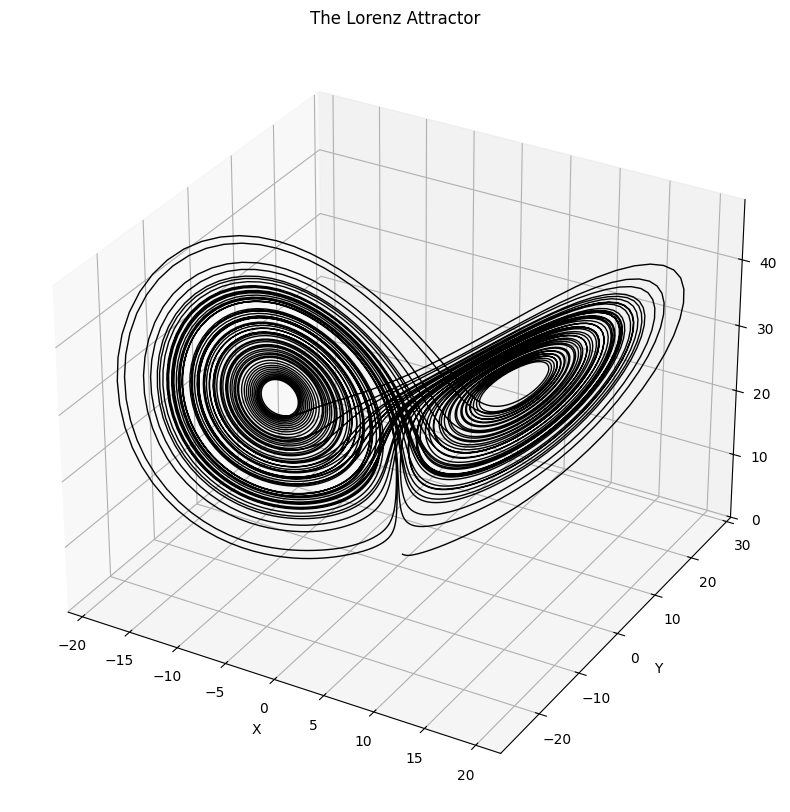

In [6]:
if solution.success:
	x_coords, y_coords, z_coords = solution.y
	print(solution)

	fig = plt.figure(figsize=(12,10))
	ax = plt.axes(projection="3d") # add 3D subplot to the figure

	# plot the trajectory
	ax.plot3D(x_coords, y_coords, z_coords, lw=1, color="black",alpha=1)

	ax.set_xlabel("X")
	ax.set_ylabel("Y")
	ax.set_zlabel("Z")
	ax.set_title("The Lorenz Attractor")
	ax.grid(True)
	plt.show()
else:
	print(f"\nSolver failed: {solution.message}")